## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import pandas as pd

def get_data(data_path: str):
    return pd.read_csv(data_path)

data = get_data(data_path='motorbike_ambulance_calls.csv')

print(data.describe())

print(data.min())

print(data.max())

print(data.shape)


       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0      

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [5]:
import pandas as pd

data = pd.read_csv('motorbike_ambulance_calls.csv')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [6]:
import pandas as pd

data = pd.read_csv('motorbike_ambulance_calls.csv')

spaces = data.isnull().sum()
print(spaces)


index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1.   Для скачування даних використовується pd.read_csv, він дозволяє читати дані з файлу і зберігати їх як DataFrame
2.   Для отримання основної інформації потрібен метод describe, він надає показники для змінних
3. Для виведення максимальних та мінімальних значень по всім змінним використовується min та max



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [ ]:
import pandas as pd

def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df
  
data = tranform_date(data, 'date')


In [ ]:
import pandas as pd

def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

    get_time_limits(data, 'date')

In [ ]:
Перетворення стовбця date в змінну date. Ше був визначенний перший і останній день в датасеті

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет


In [9]:
data_categorical = data.select_dtypes(include=['object'])


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [10]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_dict = {"spring": 1, "summer": 2, "autumn": 3, "winter": 4}
    df[season_col_name] = df[season_col_name].map(season_dict)
    return df

data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

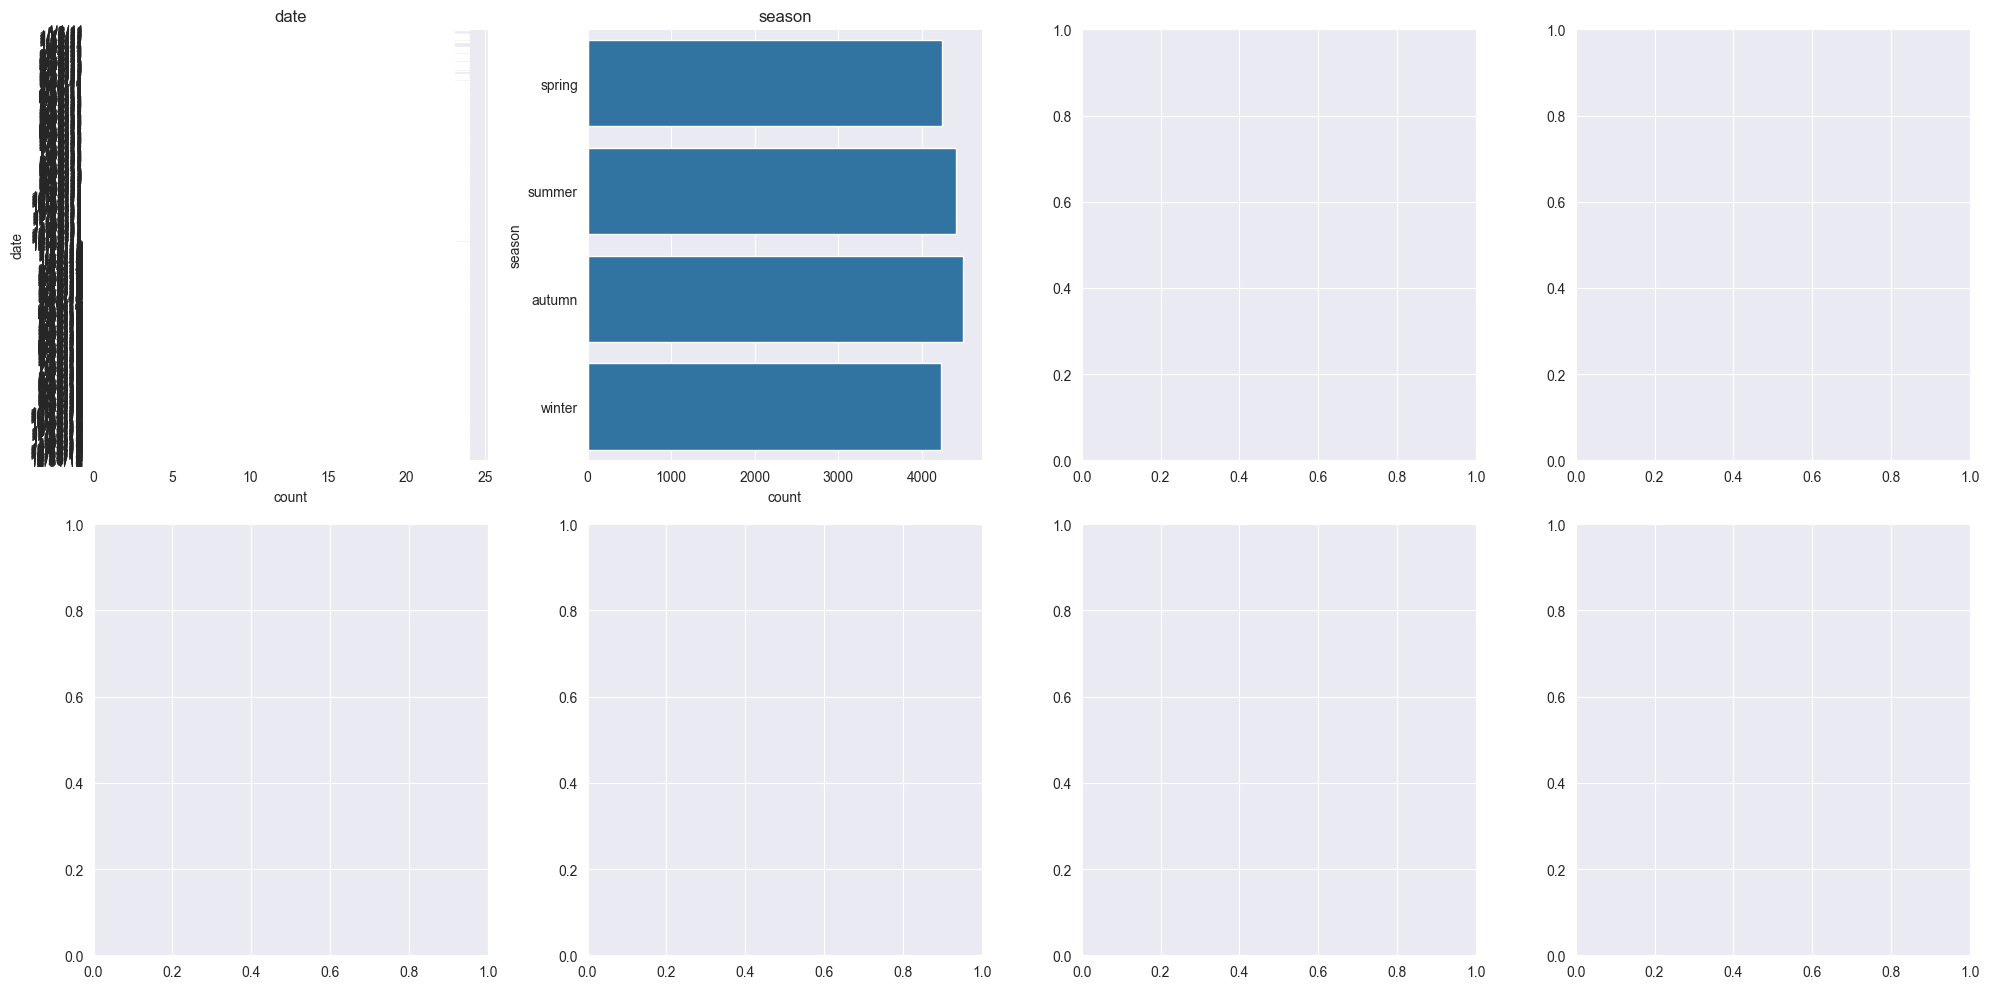

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(data_categorical[variable], ax=subplot)
    subplot.set_title(variable)

plt.tight_layout()
plt.show()


**Висновки з 5-7 завдання (детальні)**



1.   Там виділяються категоріальні змінні в окремий датасет для кращого аналізу в майбутньому
2.   season перетворився в часову шкалу, це може полегшити аналіз і використання в програмах яким потрібні числові значення, бо з числами можна працювати в рази скорше ніж з строками
3.   Для кожної змінної побудував countplot, через нього можна побачити розподіл спостережень. Ним можна краще аналізувати рідкі категорії і вже на основі цих данних шось з ними робити



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [ ]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

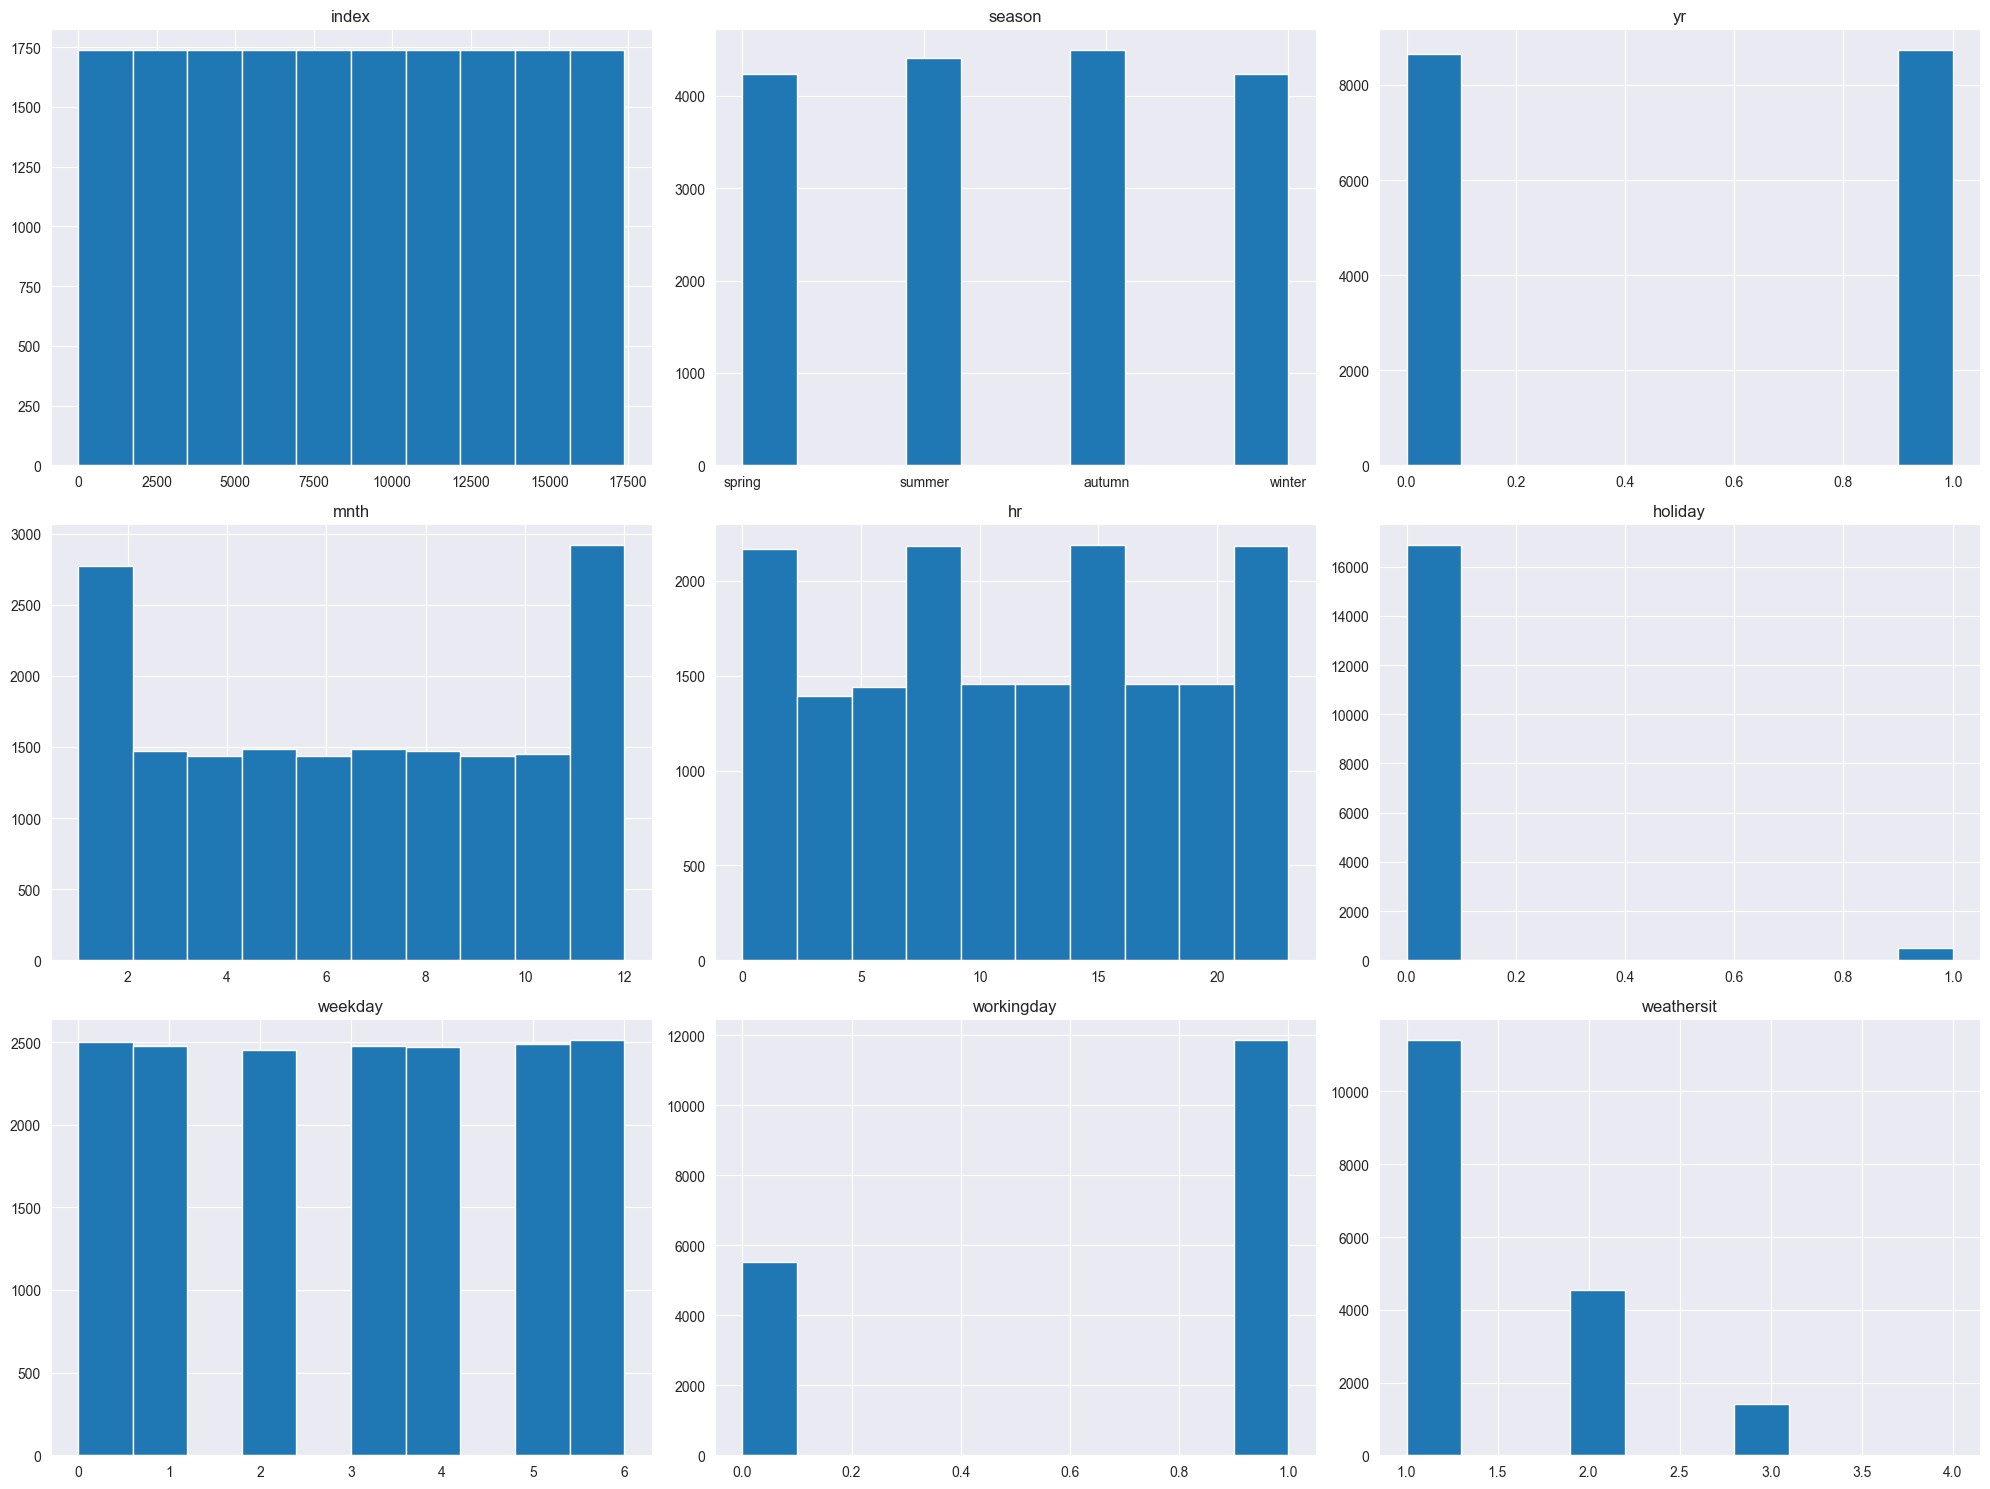

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("motorbike_ambulance_calls.csv")

fig, ax = plt.subplots(3, 3, figsize=(20, 15))

num = data.columns.drop('date')

for variable, subplot in zip(num, ax.flatten()):
    data[variable].hist(ax=subplot)
    subplot.set_title(variable)

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

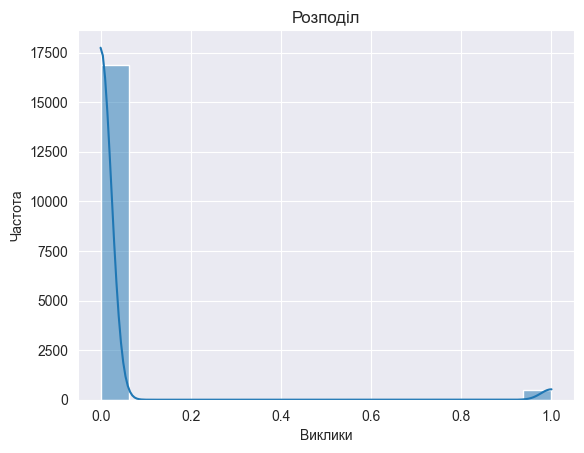

Slope Coefficient: -0.10208779083596221


In [18]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('motorbike_ambulance_calls.csv')
sns.histplot(data['holiday'], kde=True)

plt.title('Розподіл')
plt.xlabel('Виклики')
plt.ylabel('Частота')
plt.show()

coff = np.corrcoef(data['weekday'], data['holiday'])[0, 1]

print("Коефіцієнт:", coff)



**Висновки з 8-10 завдання (детальні)**



1.   Так можна легко розділити числові і категоріальні змінні, шо ускоряє процес аналізу
2.   Побудував гістограми для всіх змінних
3.  Так можна робити гістограму цільової змінної і рахувати коефіцієнт нахилу, так можна поняти як вона міняється і чи є залежність.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

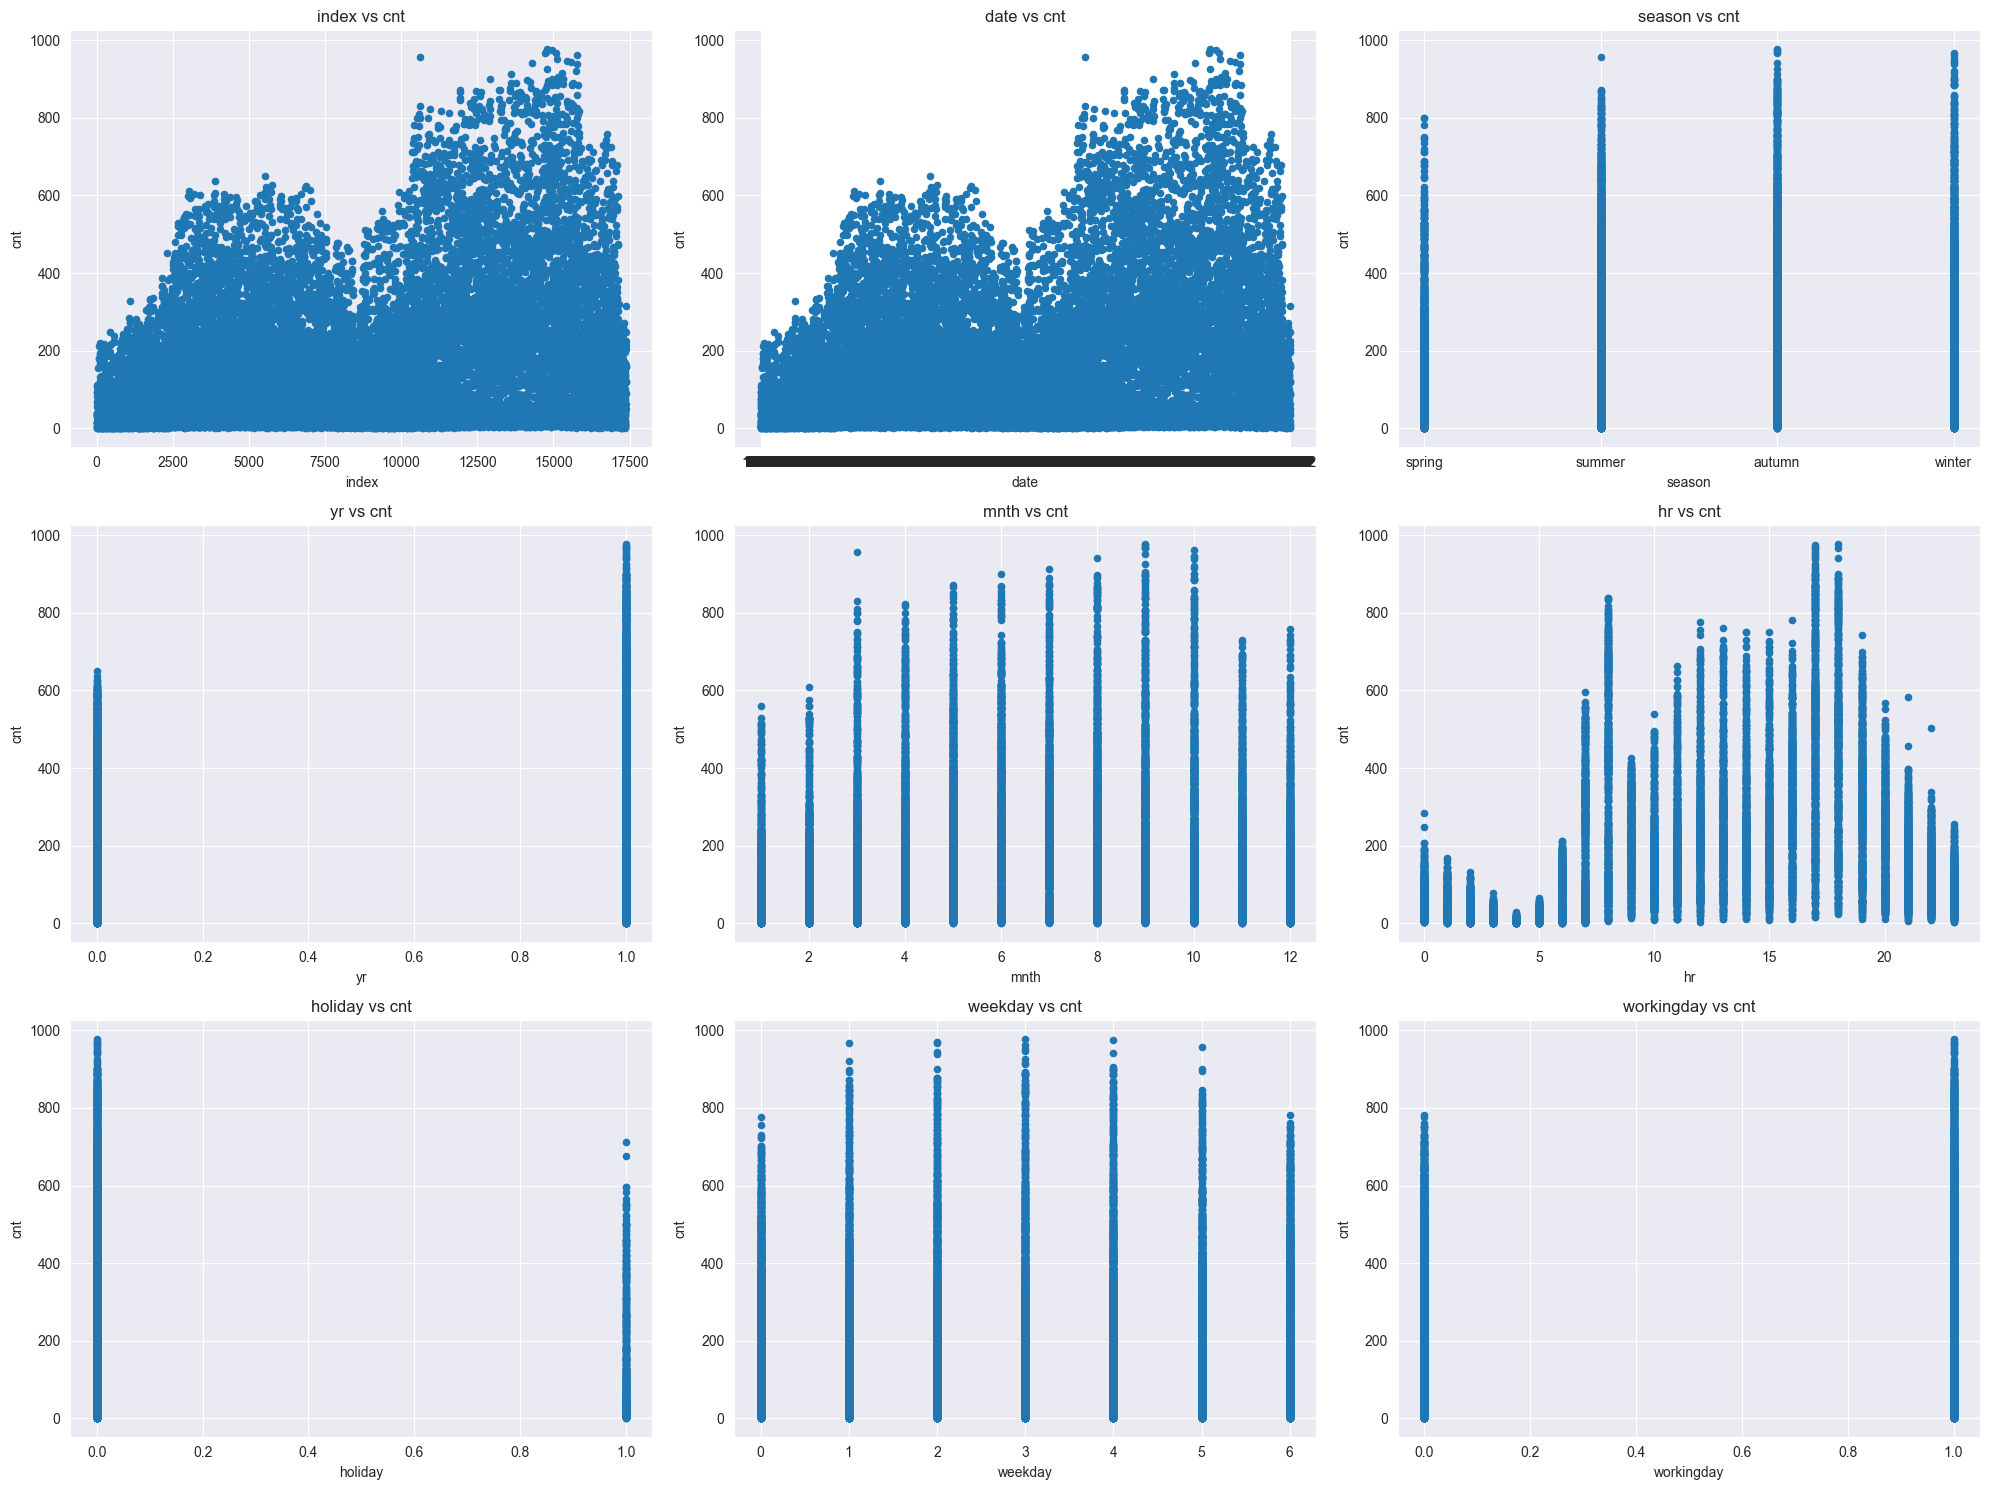

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

num = data.drop('cnt', axis=1).columns

for variable, subplot in zip(num, ax.flatten()):
    data.plot(kind='scatter', x=variable, y='cnt', ax=subplot)
    subplot.set_title(f'{variable} vs cnt')

plt.tight_layout()
plt.show()


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

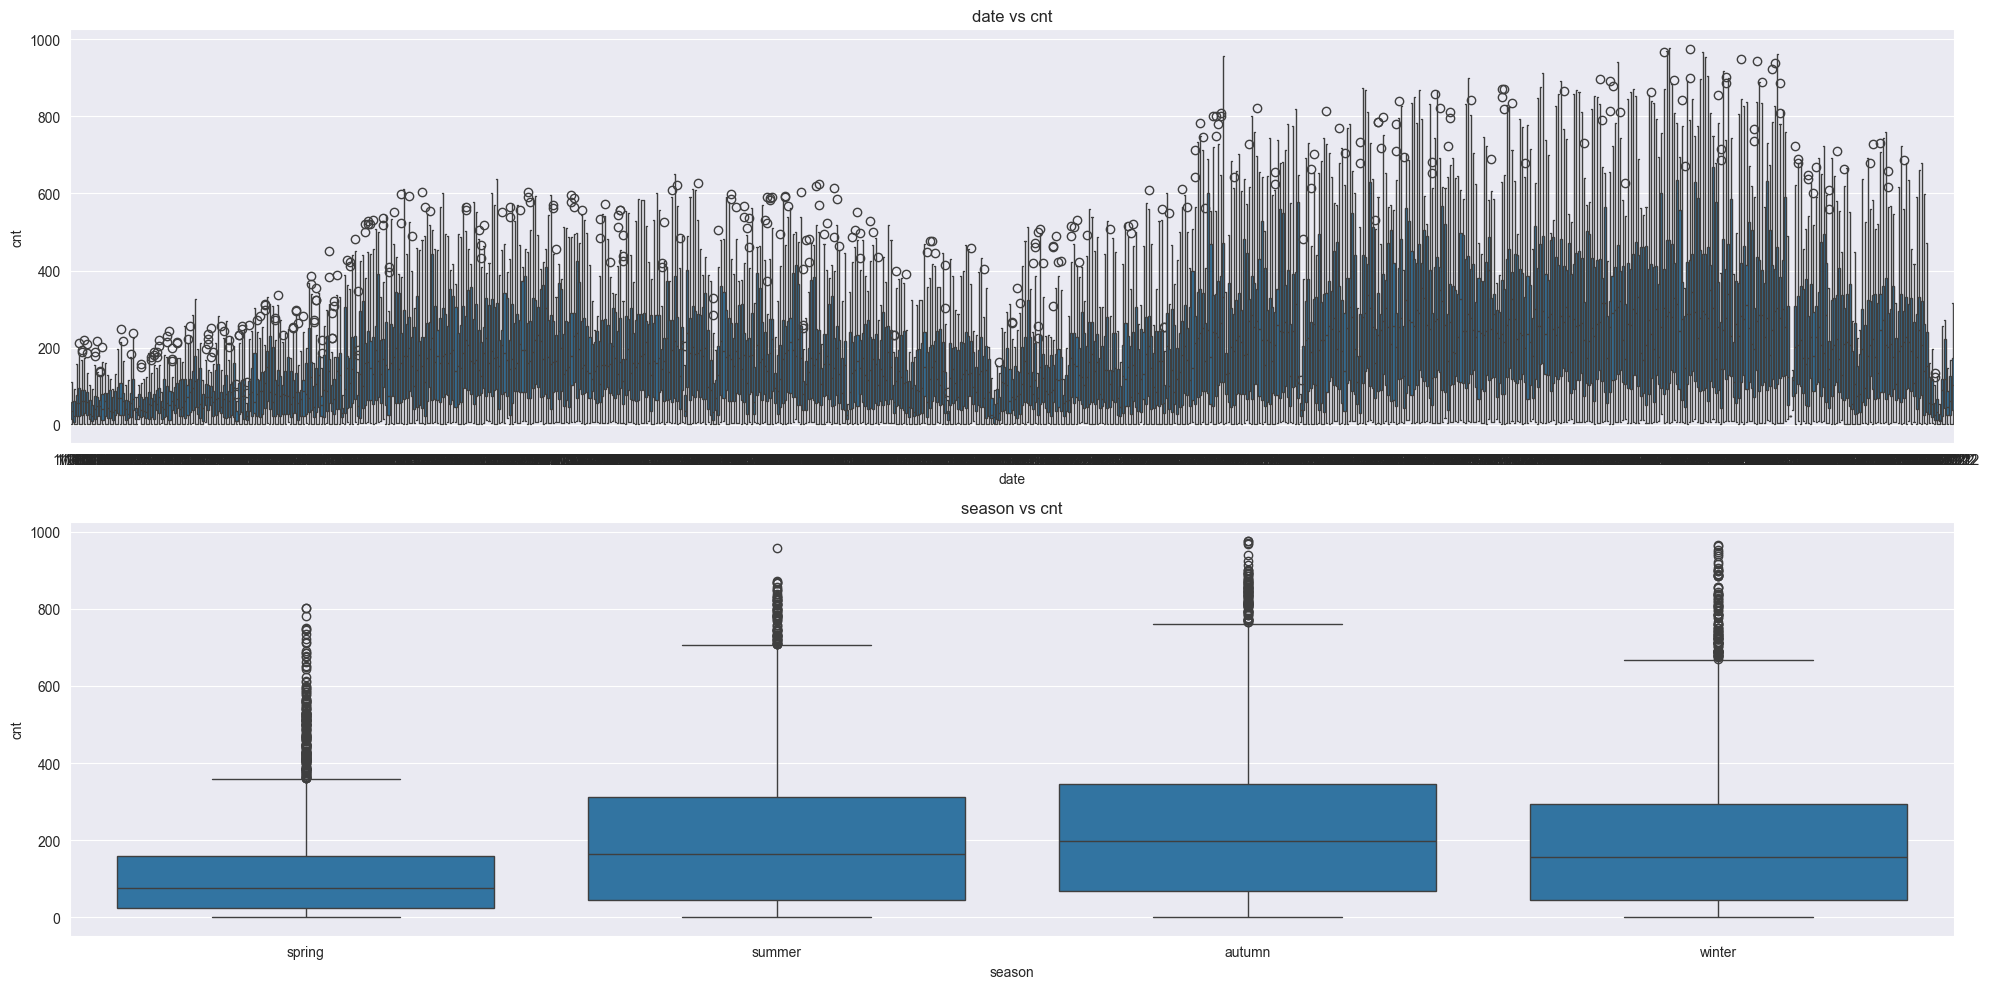

In [27]:
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
for var, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data, ax=subplot)
    subplot.set_title(f'{var} vs cnt')
    subplot.set_xlabel(var)
    subplot.set_ylabel('cnt')

plt.tight_layout()
plt.show()


**Висновки з 11-12 завдання (детальні)**



1.   Побудовано графіки scatterplot для кожної з числових змінних у порівнянні з цільовою змінною cnt.
Ці графіки дозволяють візуалізувати залежність між числовими змінними та цільовою змінною.
Через scatterplot можна визначити наявність лінійних або нелинійних залежностей між змінними.
2.   Побудовано графіки boxplot для кожної з категоріальних змінних у порівнянні з цільовою змінною cnt.
Ці графіки дозволяють візуалізувати розподіл цільової змінної у відповідних категоріях категоріальної змінної.
Boxplot допомагає виявити різницю в цільовій змінній між різними категоріями категоріальної змінної, а також виявити викиди або аномальні значення.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

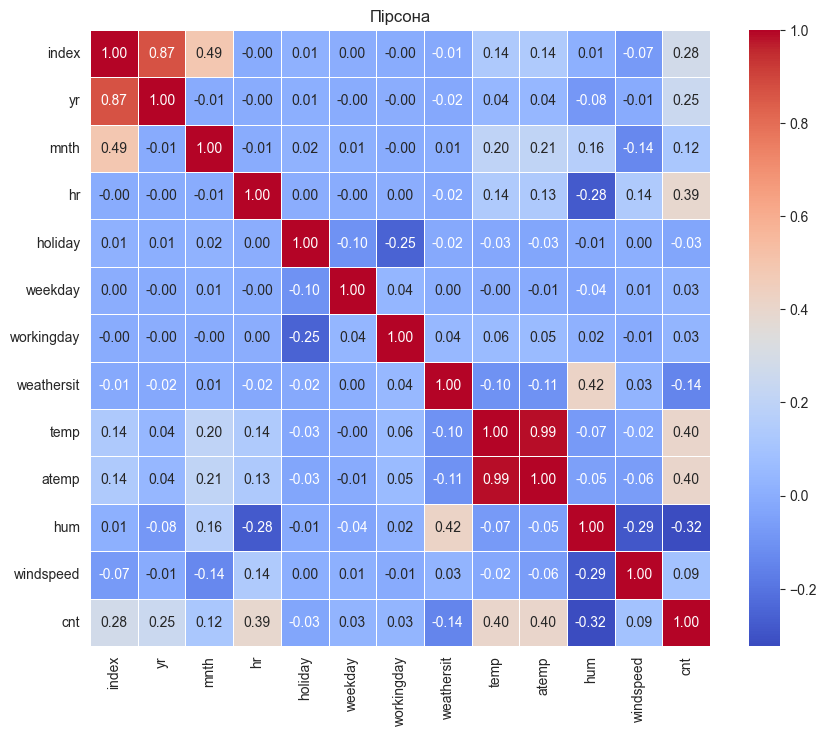

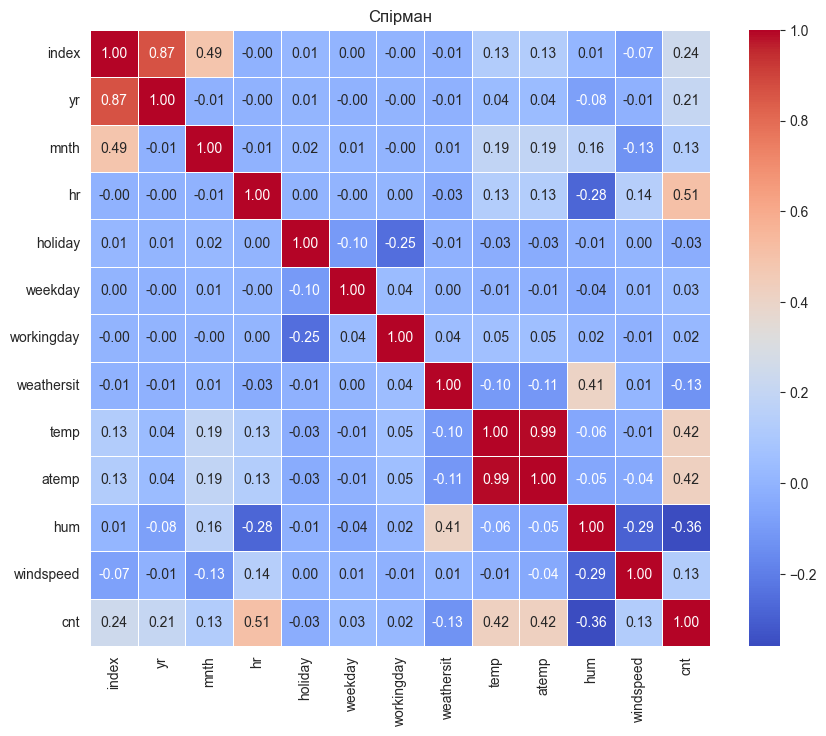

In [30]:
import seaborn as sns
import pandas as pd

data = data.select_dtypes(include=['int64', 'float64'])

pearson = data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Пірсона')
plt.show()

spearman = data.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Спірман')
plt.show()


In [ ]:
Коефіцієнти кореляції на теплокарті представлені кольорами
Метод Пірсона використовується для вимірювання лінійної залежності між змінними, а Спірмена вимірює монотонну залежність
Відмінність між двома методами полягає в тому, що метод Пірсона чутливий до лінійних залежностей, тоді як метод Спірмена враховує будь-яку монотонну залежність без обмежень щодо форми залежності.
Якщо дані мають велику асиметрію або включають велику кількість викидів, метод Спірмена може бути більш надійним, оскільки він не чутливий до аномалій у даних.
Таким чином, обираючи метод кореляції, важливо враховувати природу даних та припущення, які робляться щодо залежності між змінними

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [31]:
def get_dummies(df):
    columns_to_encode = ['season', 'mnth', 'weekday', 'weathersit']
    features = df.copy()ф
    
    dummies_list = [pd.get_dummies(df[column], prefix=column) for column in columns_to_encode]
    
    features = pd.concat([features] + dummies_list, axis=1)

    features.drop(columns=columns_to_encode, inplace=True)
    
    return features

dummies = get_dummies(data)
    

In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [32]:
dummies = dummies.assign(night_hours=(data['hr'] >= 22) | (data['hr'] <= 5))

dummies = dummies.drop(columns='hr')


NameError: name 'features' is not defined

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [ ]:
dummies_lr = dummies.drop(['atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target_column: str, test_size: float):
    from sklearn.model_selection import train_test_split
    
    X, y = df.drop(columns=[target_column]), df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = get_train_data(dummies_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
    from sklearn.linear_model import LinearRegression
    
    return LinearRegression().fit(X_train, y_train)

model = train_linear_model(X_train, y_train)


In [ ]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
  plt.scatter(y_train_pred, y_train_pred - y_train, c='hotpink', marker='o', label='Training data')
  plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')
  plt.xlabel('Predicted values')
  plt.ylabel('Residuals')
  plt.legend(loc='upper left')
  plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
  plt.tight_layout()
  plt.show()

plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [ ]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    import matplotlib.pyplot as plt
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='#5f93ad', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='#98c3d9', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
    plt.tight_layout()
    plt.show()

plot_residuals(y_train_pred, y_train, y_test_pred, y_test)


**Висновки з завдання (детальні)**

    Лінійна регресія, цей набір данних працює точніше, ніж тестовий. Обчислення квадрату для навчального набору данних дозволяє поняти, шо праивльно передбачається тільки 52%. 
    Стовпець data був видалений, бо він не є потрібен, atemp бо є temp